In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import h5py

sys.path.append('/Users/rebeccaceppas/Desktop/CHORD/H-GASP')

import observations as obs
import frequencies as fr

%load_ext autoreload
%autoreload 2

# Frequency set up

In [2]:
fmax = 1420
fmin = 1410
U = 1
fstate = fr.get_frequencies(fmax, fmin, U)

In [3]:
fstate.frequencies

array([1420.00243555, 1419.41696643, 1418.8314973 , 1418.24602818,
       1417.66055905, 1417.07508993, 1416.4896208 , 1415.90415168,
       1415.31868255, 1414.73321343, 1414.1477443 , 1413.56227518,
       1412.97680606, 1412.39133693, 1411.80586781, 1411.22039868,
       1410.63492956, 1410.04946043, 1409.46399131])

In [4]:
fstate.frequencies.size

19

# Getting upchannelization set up

In [5]:
U = 4

map_paths = './input_map.h5'
output_directory = '.'
output_filename = '/upchan_singlegal.h5'
R_filepath = 'R.npy'
norm_filepath = 'norm.npy'
freq_filepath = 'freqs_matrix.npy'

In [6]:
upchan = obs.Upchannelization(U,
                             fmax,
                             fmin,
                             map_paths,
                             output_directory,
                             output_filename, R_filepath=R_filepath,
                             norm_filepath=norm_filepath,
                             freqs_matrix_filepath=freq_filepath)

In [7]:
upchan.get_R_norm()

Up-channelization matrix with shape (76, 307) saved to ./R.npy.
Normalization vector with shape (76,) saved to ./norm.npy.
Matrix frequencies with shape (76,) saved to ./freqs_matrix.npy


# Checking up-channelization tools

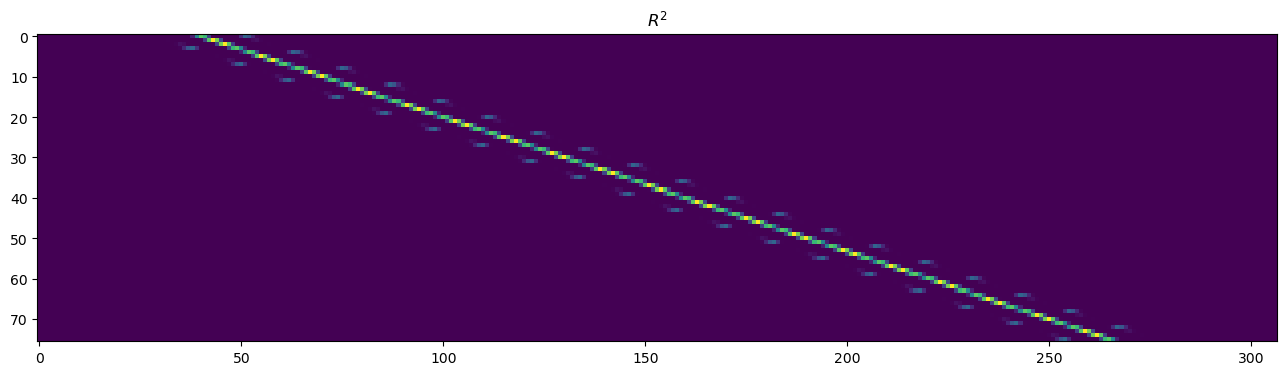

In [8]:
R = np.load('R.npy')
plt.figure(figsize=(16,10))
plt.imshow(np.abs(R))
plt.title('$R^2$')
plt.show()

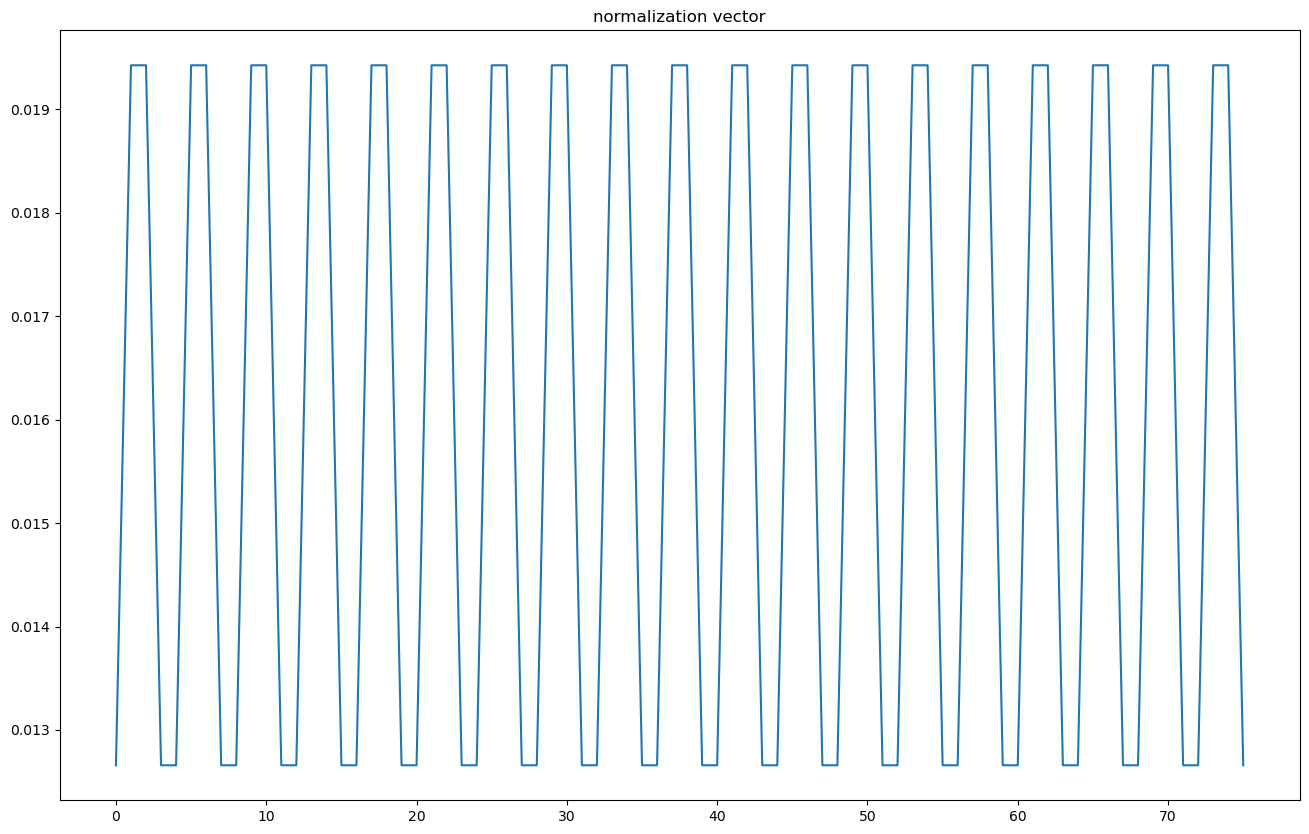

In [9]:
norm = np.load('norm.npy')
plt.figure(figsize=(16,10))
plt.plot(norm)
plt.title('normalization vector')
plt.show()

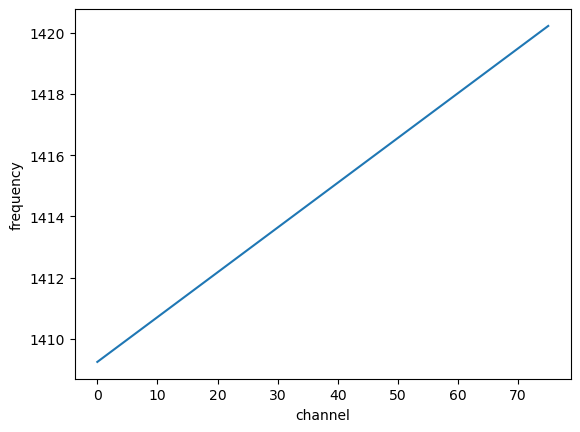

In [10]:
freqs = np.load('freqs_matrix.npy')
plt.plot(freqs)
plt.xlabel('channel')
plt.ylabel('frequency')
plt.show()

# Create a map

In [11]:
from savetools import make_map

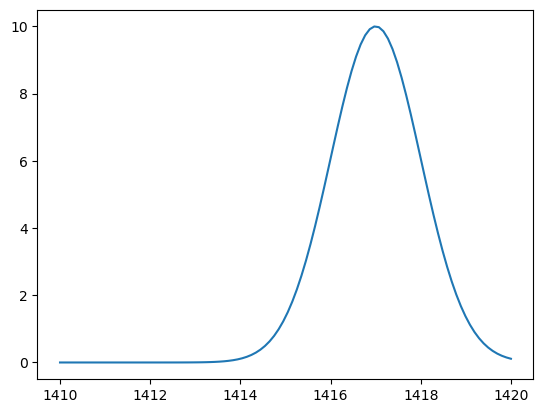

In [12]:
f = np.linspace(fmax, fmin, 100)
profile = np.exp(-(f-1417)**2/2)*10

plt.plot(f, profile)
plt.show()

In [13]:
prof = np.interp(fstate.frequencies, f[::-1], profile[::-1])


In [14]:
input_map = make_map(fstate,
         prof,
         32,
         'full',
         ra=20,
         dec=45,
         write=True,
         filename='input_map.h5')

In [15]:
ff = h5py.File('input_map.h5')
input_map = ff['map'][:]
farray = ff['index_map']['freq']
frequencies = [fi[0] for fi in farray]
ff.close()

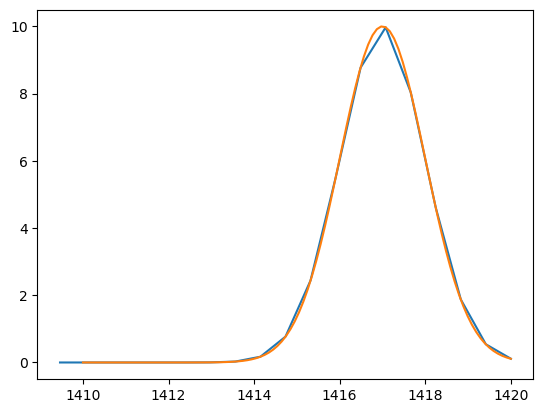

In [16]:
plt.plot(frequencies, input_map[:,0,hp.ang2pix(32,20,45,lonlat=True)])
plt.plot(f, profile)

# Up-channelize map

In [17]:
upchan.upchannelize()

Writing file ./full_input.h5 containing the input maps ./input_map.h5.
Channelized map saved at ./upchan_singlegal.h5


In [18]:
fff = h5py.File('upchan_singlegal.h5')
upchan_map = fff['map'][:]
fff.close()

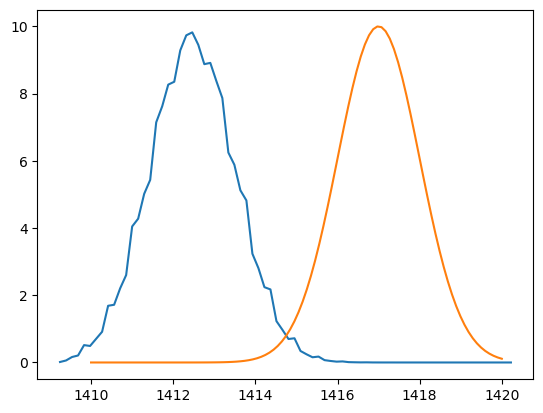

In [19]:
plt.plot(freqs, upchan_map[:,0,hp.ang2pix(32,20,45,lonlat=True)])
plt.plot(f, profile)
plt.show()